In [7]:
%reload_ext autoreload
%autoreload 2

In [1]:
!nvidia-smi

Sat Oct 11 21:19:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.07             Driver Version: 570.133.07     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  |   00000000:CA:00.0 Off |                    0 |
| N/A   40C    P0             65W /  500W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [8]:
%%time
from llama_nemo_rag_v2 import RAGMultiModalModel

CPU times: user 4 µs, sys: 5 µs, total: 9 µs
Wall time: 11.7 µs


In [9]:
%%time
MODEL_NAME = "/projects/multimodal_bootcamp/multimodal-td-2/model-weights/llama-nemoretriever-colembed-3b-v1"
ret = RAGMultiModalModel.from_pretrained(MODEL_NAME)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]

CPU times: user 2.23 s, sys: 14.5 s, total: 16.8 s
Wall time: 23.9 s


In [11]:
%%time
import os

ROOT_DIR = os.path.abspath(os.path.expanduser("/projects/multimodal_bootcamp/multimodal-td-2/suzy/llama_nemo_experiment"))
SPLIT = "val"
IMAGES_DIR = os.path.abspath(os.path.expanduser("/projects/multimodal_bootcamp/multimodal-td-2/shared/chartqa_images/val"))  
INDEX_ROOT = os.path.abspath(os.path.expanduser(f"{ROOT_DIR}/.byaldi")) 
INDEX_NAME = os.path.abspath(os.path.expanduser(f"chartqa_{SPLIT}_index"))
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128,garbage_collection_threshold:0.6"

ret.index(
    input_path=IMAGES_DIR,
    index_name="chartqa_val_index",
    index_root=INDEX_ROOT,
    metadata=[{"image_name": f} for f in sorted(os.listdir(IMAGES_DIR)) if f.endswith(".png")],
    overwrite=True,
    batch_size=4,      # start here if crashes persist
    max_side=512       # reduce tokens further if needed
)



Extracting document embeddings...: 100%|██████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


CPU times: user 4min 37s, sys: 1min 20s, total: 5min 57s
Wall time: 11min


In [12]:
from datasets import Dataset

TEAM_ROOT_DIR = "/projects/multimodal_bootcamp/multimodal-td-2/shared"
refined_path = f"{TEAM_ROOT_DIR}/refined_chartqa/val-100_qwen25_vl_7b_instruct"
refined_dset = Dataset.load_from_disk(refined_path)
safe_dset = refined_dset.filter(lambda row: row["label"] == row["refined_label"])
safe_dset

Dataset({
    features: ['image', 'query', 'label', 'human_or_machine', 'image_id', 'refined_query', 'refined_label'],
    num_rows: 72
})

Query: Which line on the graph reaches its peak at 56?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


ret_results: [{'doc_id': 298, 'page_num': 1, 'score': 81.19796752929688, 'metadata': {'image_name': 'img_43edad4ab25fa1347c0bb941289f55a7.png'}, 'base64': None}, {'doc_id': 700, 'page_num': 1, 'score': 80.4459457397461, 'metadata': {'image_name': 'img_a6f32c7a0418b2123a0ef942bf0cb787.png'}, 'base64': None}, {'doc_id': 1033, 'page_num': 1, 'score': 80.35843658447266, 'metadata': {'image_name': 'img_fbfe27185fb3b6971dc153b972f7e8ea.png'}, 'base64': None}]


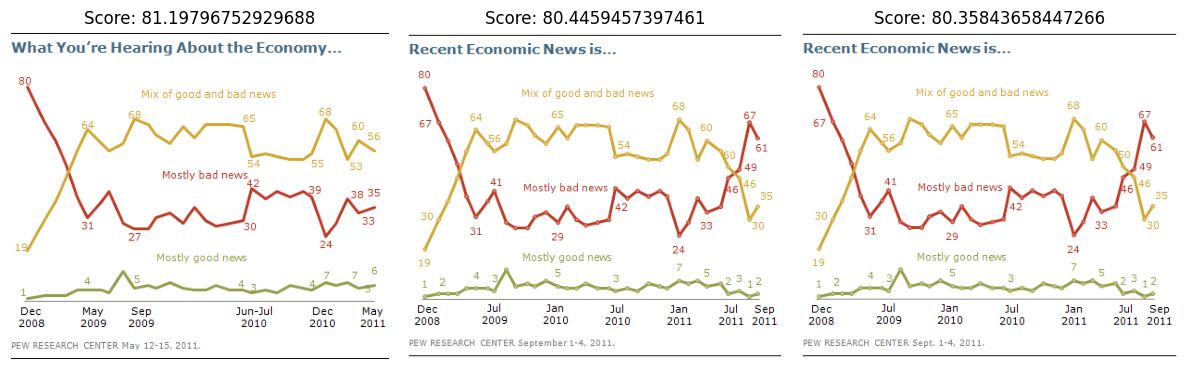


Query: What is the highest percentage shown on the blue line in the chart?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


ret_results: [{'doc_id': 55, 'page_num': 1, 'score': 86.18275451660156, 'metadata': {'image_name': 'img_0c97c14933fbeff52fa8a0f525e31b42.png'}, 'base64': None}, {'doc_id': 797, 'page_num': 1, 'score': 85.89122772216797, 'metadata': {'image_name': 'img_bdb77225691004fdeee24f4d778637c6.png'}, 'base64': None}, {'doc_id': 774, 'page_num': 1, 'score': 85.77066802978516, 'metadata': {'image_name': 'img_b87424f5e920605ed5fe3b2b27cbd8f8.png'}, 'base64': None}]


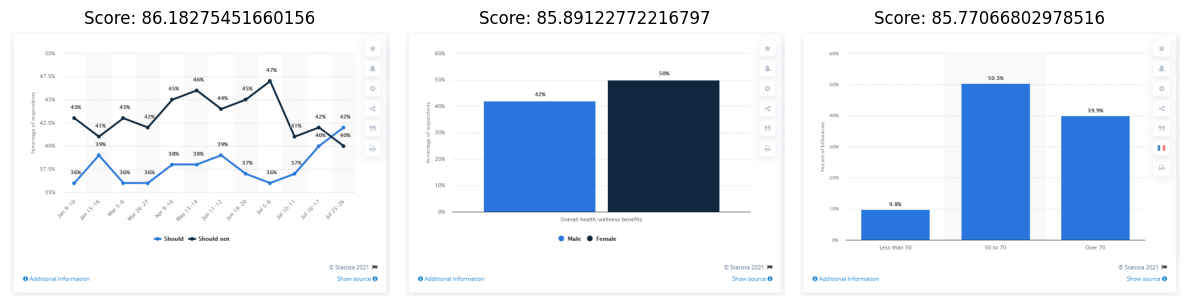


Query: In 2016, what percentage of respondents said that jobs were a top priority for the president and Congress?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


ret_results: [{'doc_id': 338, 'page_num': 1, 'score': 78.7642593383789, 'metadata': {'image_name': 'img_4c61401b890559d3fe2753c983945493.png'}, 'base64': None}, {'doc_id': 702, 'page_num': 1, 'score': 77.63744354248047, 'metadata': {'image_name': 'img_a82244886c241cf4f4848451dfa51ec5.png'}, 'base64': None}, {'doc_id': 164, 'page_num': 1, 'score': 77.18204498291016, 'metadata': {'image_name': 'img_24fb290580be89d20bbcff2a03b4c9a7.png'}, 'base64': None}]


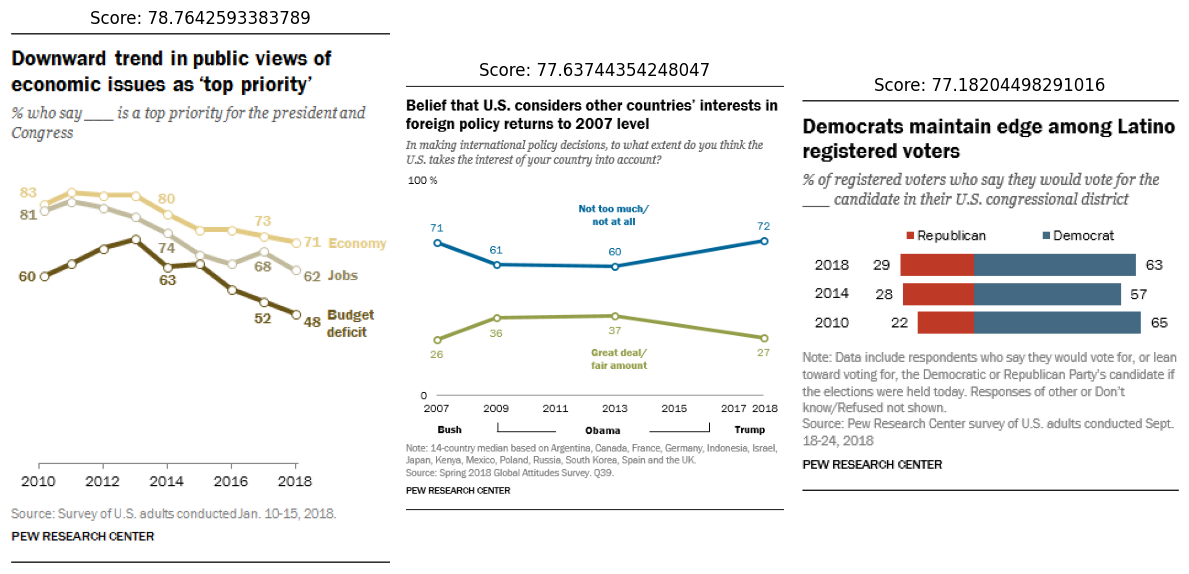


Query: In which category did 71% of respondents say was a top priority for the president and Congress?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


ret_results: [{'doc_id': 562, 'page_num': 1, 'score': 81.93563079833984, 'metadata': {'image_name': 'img_83769fe3410de5e93fa44ca5faa412c8.png'}, 'base64': None}, {'doc_id': 535, 'page_num': 1, 'score': 81.7148666381836, 'metadata': {'image_name': 'img_7cbc59b23d9b3afeb80ed04e96b31836.png'}, 'base64': None}, {'doc_id': 713, 'page_num': 1, 'score': 81.63409423828125, 'metadata': {'image_name': 'img_aaaf8566105bfa535685cadc31ec7bd5.png'}, 'base64': None}]


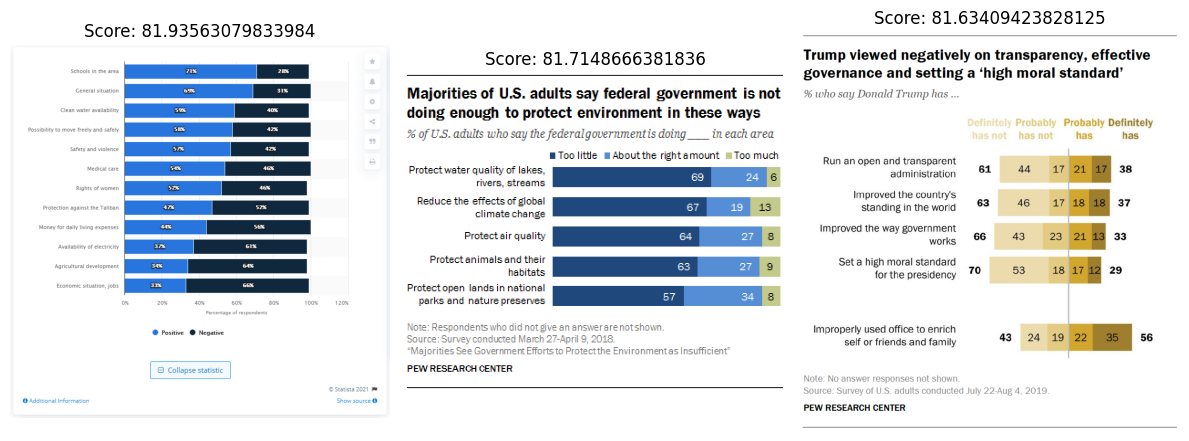


Query: What percentage of people viewed Ennahda unfavorably in 2014?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


ret_results: [{'doc_id': 517, 'page_num': 1, 'score': 79.29492950439453, 'metadata': {'image_name': 'img_76be3b4b6906abcbff6f3d372be36191.png'}, 'base64': None}, {'doc_id': 175, 'page_num': 1, 'score': 73.28427124023438, 'metadata': {'image_name': 'img_27d15b0ef0e23a53deaa2c4f1fc5e0dd.png'}, 'base64': None}, {'doc_id': 811, 'page_num': 1, 'score': 71.04912567138672, 'metadata': {'image_name': 'img_c1d71891cd9a8ce4b94bed04833f4721.png'}, 'base64': None}]


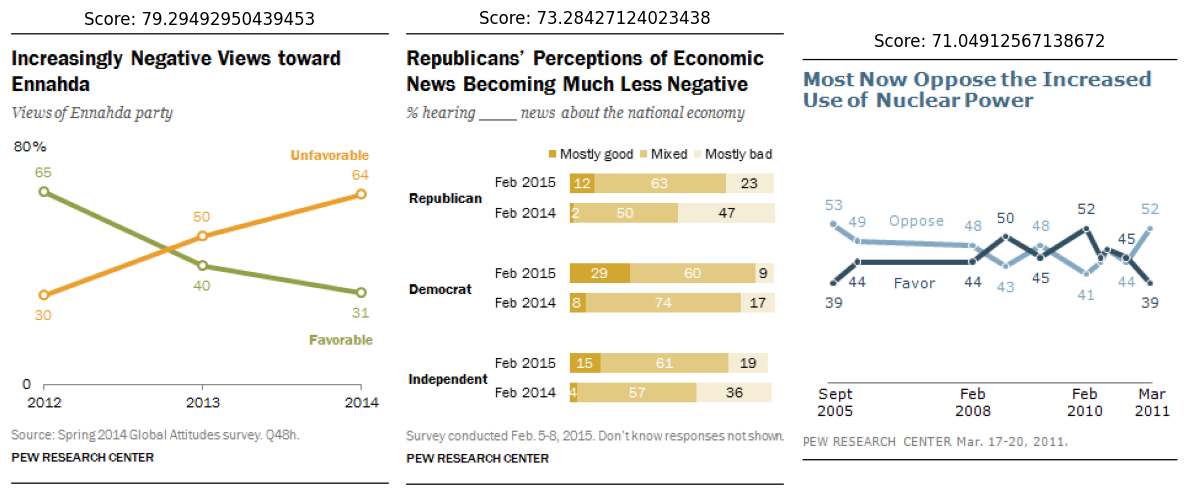


Query: What is the median value of the favorable line in the graph?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


ret_results: [{'doc_id': 517, 'page_num': 1, 'score': 82.56780242919922, 'metadata': {'image_name': 'img_76be3b4b6906abcbff6f3d372be36191.png'}, 'base64': None}, {'doc_id': 811, 'page_num': 1, 'score': 80.986083984375, 'metadata': {'image_name': 'img_c1d71891cd9a8ce4b94bed04833f4721.png'}, 'base64': None}, {'doc_id': 298, 'page_num': 1, 'score': 80.23965454101562, 'metadata': {'image_name': 'img_43edad4ab25fa1347c0bb941289f55a7.png'}, 'base64': None}]


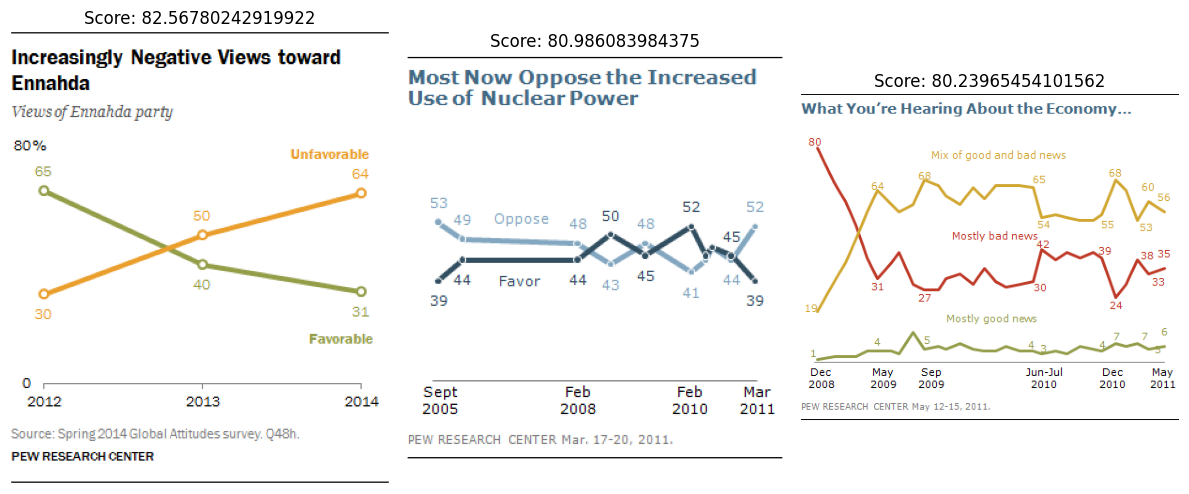


Query: How many times did the percentage of people who disapproved of Barack Obama's job performance exceed 50% during the period shown in the chart?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


ret_results: [{'doc_id': 711, 'page_num': 1, 'score': 86.4144058227539, 'metadata': {'image_name': 'img_aa0c1f9a40583a5c0b55fd91da7a8dff.png'}, 'base64': None}, {'doc_id': 995, 'page_num': 1, 'score': 82.95626831054688, 'metadata': {'image_name': 'img_f31b56c84fa890a5eb6e1fd7bd1e18a8.png'}, 'base64': None}, {'doc_id': 811, 'page_num': 1, 'score': 82.43539428710938, 'metadata': {'image_name': 'img_c1d71891cd9a8ce4b94bed04833f4721.png'}, 'base64': None}]


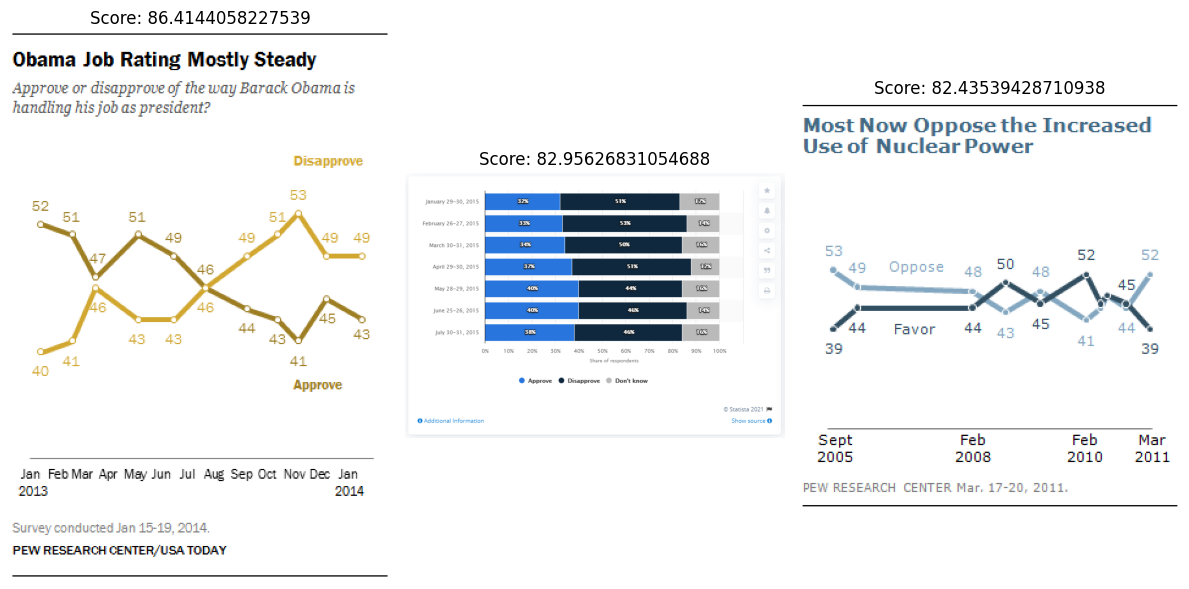


Query: What category consistently shows the lowest percentage throughout the period from December 2008 to September 2011?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


ret_results: [{'doc_id': 365, 'page_num': 1, 'score': 82.55782318115234, 'metadata': {'image_name': 'img_526562e86528b5b1dd71294ea22d980b.png'}, 'base64': None}, {'doc_id': 700, 'page_num': 1, 'score': 82.3990707397461, 'metadata': {'image_name': 'img_a6f32c7a0418b2123a0ef942bf0cb787.png'}, 'base64': None}, {'doc_id': 1033, 'page_num': 1, 'score': 82.25630187988281, 'metadata': {'image_name': 'img_fbfe27185fb3b6971dc153b972f7e8ea.png'}, 'base64': None}]


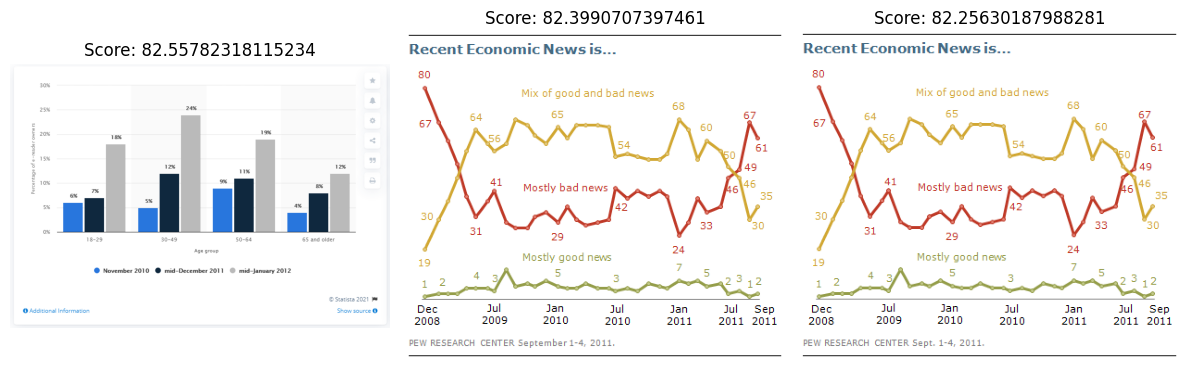


Query: What was the increase in the percentage of people who said the economic news was mostly bad from January 2011 to September 2011?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


ret_results: [{'doc_id': 700, 'page_num': 1, 'score': 81.52764892578125, 'metadata': {'image_name': 'img_a6f32c7a0418b2123a0ef942bf0cb787.png'}, 'base64': None}, {'doc_id': 1033, 'page_num': 1, 'score': 81.4757080078125, 'metadata': {'image_name': 'img_fbfe27185fb3b6971dc153b972f7e8ea.png'}, 'base64': None}, {'doc_id': 573, 'page_num': 1, 'score': 80.86825561523438, 'metadata': {'image_name': 'img_85eac1c4fb3461baa9cce5f54a9c2abe.png'}, 'base64': None}]


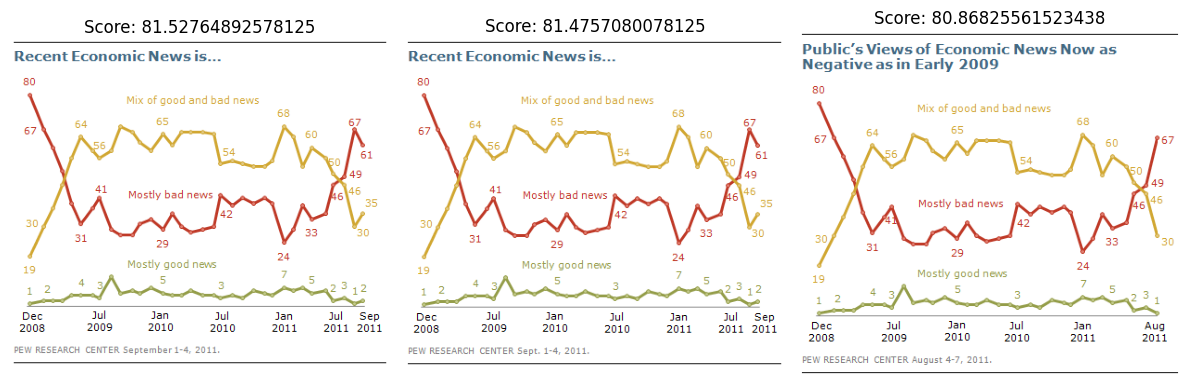


Query: What is the sum of the highest values for each line on the chart?


Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


ret_results: [{'doc_id': 720, 'page_num': 1, 'score': 84.76238250732422, 'metadata': {'image_name': 'img_ac7d098236b803d10cd8d7c8f0bf4280.png'}, 'base64': None}, {'doc_id': 358, 'page_num': 1, 'score': 84.57075500488281, 'metadata': {'image_name': 'img_4fea08b6cfd6338d40a877349b9c1a3f.png'}, 'base64': None}, {'doc_id': 338, 'page_num': 1, 'score': 84.41664123535156, 'metadata': {'image_name': 'img_4c61401b890559d3fe2753c983945493.png'}, 'base64': None}]


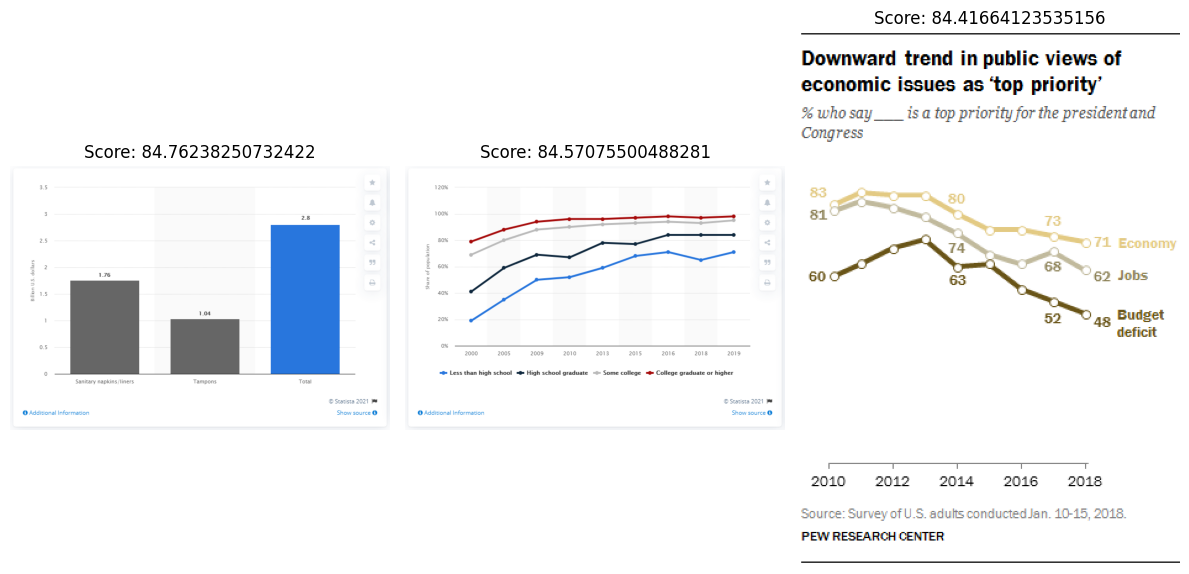


CPU times: user 2.99 s, sys: 2.23 s, total: 5.22 s
Wall time: 7.64 s


In [19]:
%%time
for row in safe_dset.select(range(10)):
    query = row["refined_query"]
    print(f"Query: {query}")
    ret_results = ret.search(query, k=3)
    print(f"ret_results: {ret_results}")
    ret.plot_results(ret_results, IMAGES_DIR)
    print("=" * 120 + "\n")

In [15]:
%%time
import json

def run_llama_nemo_search_and_attach(dset: Dataset, ret, k: int = 3) -> Dataset:
    results_json = []
    for row in dset:
        query = row["refined_query"]
        hits = ret.search(query, k=k)  
        cleaned = []
        for h in hits:
            cleaned.append({
                "doc_id":   int(h.get("doc_id", -1)),
                "page_num": int(h.get("page_num", 1)),
                "score":    float(h.get("score", 0.0)),
                "metadata": {"image_name": h.get("metadata", {}).get("image_name")},
                "base64":   None,  
            })
        results_json.append(json.dumps(cleaned))
    return dset.add_column("llama_nemo_result", results_json)
    
ret_result_llama_nemo = run_llama_nemo_search_and_attach(safe_dset, ret, k=3)
save_dir = f"{ROOT_DIR}/retrieval/ret_result_llama_nemo"
ret_result_llama_nemo.save_to_disk(save_dir)
print("Saved to:", save_dir)

Extracting query embeddings...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


Saving the dataset (0/1 shards):   0%|          | 0/72 [00:00<?, ? examples/s]

Saved to: /projects/multimodal_bootcamp/multimodal-td-2/suzy/llama_nemo_experiment/retrieval/ret_result_llama_nemo
CPU times: user 3.32 s, sys: 14 s, total: 17.3 s
Wall time: 34.1 s


In [16]:
%%time
from datasets import load_from_disk

def load_llama_nemo(path: str):
    dset_with_results = load_from_disk(path)
    parsed = []
    for s in dset_with_results["llama_nemo_result"]:
        parsed.append(json.loads(s))  
    return parsed

ret_result_llama_nemo_lists = load_llama_nemo(save_dir)
ret_result_llama_nemo_lists

CPU times: user 2.45 ms, sys: 3.31 ms, total: 5.76 ms
Wall time: 6.03 ms


[[{'doc_id': 298,
   'page_num': 1,
   'score': 81.19796752929688,
   'metadata': {'image_name': 'img_43edad4ab25fa1347c0bb941289f55a7.png'},
   'base64': None},
  {'doc_id': 700,
   'page_num': 1,
   'score': 80.4459457397461,
   'metadata': {'image_name': 'img_a6f32c7a0418b2123a0ef942bf0cb787.png'},
   'base64': None},
  {'doc_id': 1033,
   'page_num': 1,
   'score': 80.35843658447266,
   'metadata': {'image_name': 'img_fbfe27185fb3b6971dc153b972f7e8ea.png'},
   'base64': None}],
 [{'doc_id': 55,
   'page_num': 1,
   'score': 86.18275451660156,
   'metadata': {'image_name': 'img_0c97c14933fbeff52fa8a0f525e31b42.png'},
   'base64': None},
  {'doc_id': 797,
   'page_num': 1,
   'score': 85.89122772216797,
   'metadata': {'image_name': 'img_bdb77225691004fdeee24f4d778637c6.png'},
   'base64': None},
  {'doc_id': 774,
   'page_num': 1,
   'score': 85.77066802978516,
   'metadata': {'image_name': 'img_b87424f5e920605ed5fe3b2b27cbd8f8.png'},
   'base64': None}],
 [{'doc_id': 338,
   'page_

In [17]:
%%time
loaded = load_from_disk(save_dir)

CPU times: user 4 ms, sys: 13 µs, total: 4.01 ms
Wall time: 4.08 ms


In [18]:
%%time
llama_nemo_by_image_id = {
    row["image_id"]: json.loads(row["llama_nemo_result"])
    for row in loaded
}
llama_nemo_by_image_id

CPU times: user 411 ms, sys: 9.06 ms, total: 420 ms
Wall time: 420 ms


{'img_d7c3aba11cd1a0d5e2d75dc0bbf5f023': [{'doc_id': 298,
   'page_num': 1,
   'score': 81.19796752929688,
   'metadata': {'image_name': 'img_43edad4ab25fa1347c0bb941289f55a7.png'},
   'base64': None},
  {'doc_id': 700,
   'page_num': 1,
   'score': 80.4459457397461,
   'metadata': {'image_name': 'img_a6f32c7a0418b2123a0ef942bf0cb787.png'},
   'base64': None},
  {'doc_id': 1033,
   'page_num': 1,
   'score': 80.35843658447266,
   'metadata': {'image_name': 'img_fbfe27185fb3b6971dc153b972f7e8ea.png'},
   'base64': None}],
 'img_a82244886c241cf4f4848451dfa51ec5': [{'doc_id': 55,
   'page_num': 1,
   'score': 86.18275451660156,
   'metadata': {'image_name': 'img_0c97c14933fbeff52fa8a0f525e31b42.png'},
   'base64': None},
  {'doc_id': 797,
   'page_num': 1,
   'score': 85.89122772216797,
   'metadata': {'image_name': 'img_bdb77225691004fdeee24f4d778637c6.png'},
   'base64': None},
  {'doc_id': 774,
   'page_num': 1,
   'score': 85.77066802978516,
   'metadata': {'image_name': 'img_b87424f5